# The Perceptron

### Classifying Adelie and Chinstrap Penguins


Let's begin with a brief review of what the Perceptron is! One of the most basic structures of machine learning is this single-neuron model, which functions similarly to an actual neuron that could be found in the brain. Here is an image of the Perceptron structure (and one of Dr. Davila's favorite images to reference back to :)):

<div style="display: flex;">
    <div style="margin-right: 20px;">
        <img src="ThePerceptronImage.png" width="550" height="300"
    </div>
<div>

The Perceptron takes in a few inputs, denoted *x1, x2,...,xn*. Each of these inputs are multiplied by their respective weights: *w1, w2,...,wn*. These multiplied values are then added together to get a final Weighted Sum (This is called a linear combination in lin alg!). We also add the bias, which essentially shifts the activation function curve up and down (more on the function below!).

The next big step is to pass this sum into the activation function such that information is binarily classified. Lastly, the post-activation function, or cost function, will help correct any ouputs that have been classified incorrectly by our single neuron model.


In the Palmer Penguins dataset, the labels -1 and 1 represent the two classes into which the penguines are classified:

Adelie = -1

Chinstrap = 1

In this notebook, we will build a model that predicts whether a penguin is an Adelie penguin or a Chinstrap penguin based on two characteristics: its bill length and bill depth. This is a binary classification problem, and my first attempt at machine learning!



In [12]:
#We import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions


We then load in the data and drop any NaN rows. We also find out how many unique species exist.

In [13]:
# Load the Palmer Penguins dataset and drop NaN rows
penguins = pd.read_csv(r"C:\Users\faith\inde 577\577repo\Supervised Learning\Datasets\palmer_penguins.csv")
penguins = penguins.dropna()

#We find out that there are three distinct penguin species.
penguins['species'].unique() 

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

We will remove one of the penguin species, because this is a binary classification problem, after all. As such, we will just be sorting between Adelie and Chinstrap penguins. We can also draw boundaries between 2+ categories, but for the sake of this notebook, we will just do two. 

<div style="display: flex;">
    <div style="margin-right: 20px;">
        <img src="adelie_penguin.jpg" width="100" height="150">
        <p>Adelie Penguin</p>
    </div>
    <div>
        <img src="chinstrap_penguin.jpg" width="100" height="150">
        <p>Chinstrap Penguin</p>
    </div>
</div>



In [14]:
penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]
penguins['species'].unique() 


array(['Adelie', 'Chinstrap'], dtype=object)

We assign target variables with values.

In [15]:
# Select features and target variable
X = penguins[['bill_length_mm', 'bill_depth_mm']].values

# Convert each entry of y with Adelie to -1 and otherwise 1
y = penguins.species.values
y = np.where(y == 'Adelie', -1, 1)


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# We train on the built-on Perceptron module. This has a default epoch value of 1000.
clf = Perceptron()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#The accuracy is pretty good!

Accuracy: 0.9692307692307692


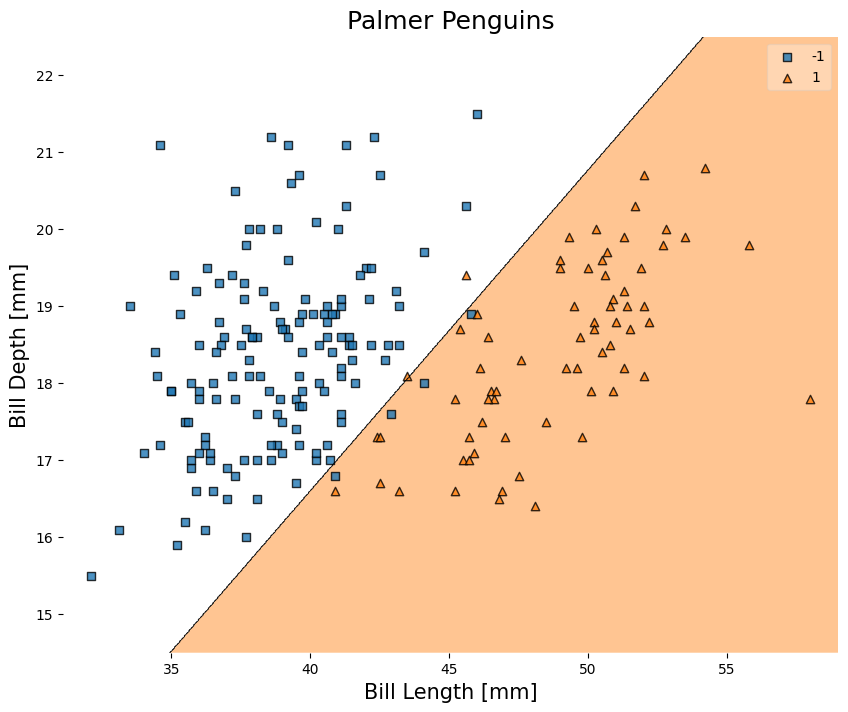

In [19]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("Palmer Penguins", fontsize = 18)
plt.xlabel("Bill Length [mm]", fontsize = 15)
plt.ylabel("Bill Depth [mm]", fontsize = 15)
plt.show()

Conclusion: 